In [105]:
#!pip install dataprep klib

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import klib
from dataprep.eda import create_report
import warnings
warnings.filterwarnings('ignore')

In [107]:
glass = pd.read_excel('/content/glass.xlsx',sheet_name='glass')
glass.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [108]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [109]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [110]:
glass.duplicated().sum()

1

In [111]:
glass[glass.duplicated()]

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1

In [112]:
glass[(glass['RI']==1.52213) & (glass['Na']==14.21)]

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
38  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1

In [113]:
glass = glass.drop_duplicates()

In [114]:
glass.describe()

RI          Na          Mg          Al          Si           K  \
count  213.000000  213.000000  213.000000  213.000000  213.000000  213.000000   
mean     1.518348   13.404085    2.679202    1.449484   72.655070    0.498873   
std      0.003033    0.816662    1.443691    0.495925    0.773998    0.653185   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516520   12.900000    2.090000    1.190000   72.280000    0.130000   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.560000   
75%      1.519150   13.810000    3.600000    1.630000   73.090000    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  213.000000  213.000000  213.000000  213.000000  
mean     8.954085    0.175869    0.057277    2.788732  
std      1.425882    0.498245    0.097589    2.105130  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.150000    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [115]:
corr = glass.corr()
corr

RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.198802 -0.127526 -0.400973 -0.539000 -0.287645  0.811183   
Na   -0.198802  1.000000 -0.278420  0.167735 -0.064885 -0.264158 -0.278194   
Mg   -0.127526 -0.278420  1.000000 -0.479575 -0.162437  0.007617 -0.446197   
Al   -0.400973  0.167735 -0.479575  1.000000 -0.016195  0.323683 -0.258068   
Si   -0.539000 -0.064885 -0.162437 -0.016195  1.000000 -0.197281 -0.207145   
K    -0.287645 -0.264158  0.007617  0.323683 -0.197281  1.000000 -0.317032   
Ca    0.811183 -0.278194 -0.446197 -0.258068 -0.207145 -0.317032  1.000000   
Ba    0.001679  0.329080 -0.491818  0.480642 -0.104389 -0.043653 -0.112208   
Fe    0.147083 -0.239374  0.085426 -0.080583 -0.097717 -0.009372  0.126314   
Type -0.160140  0.508837 -0.744195  0.597432  0.147725 -0.012455  0.002677   

            Ba        Fe      Type  
RI    0.001679  0.147083 -0.160140  
Na    0.329080 -0.239374  0.508837  
Mg   -0.491818  0.085426 -0.744195  
Al    0.480642 -0.080583  0.597432  
Si   -0.104389 -0.097717  0.147725  
K    -0.043653 -0.009372 -0.012455  
Ca   -0.112208  0.126314  0.002677  
Ba    1.000000 -0.059729  0.574896  
Fe   -0.059729  1.000000 -0.191090  
Type  0.574896 -0.191090  1.000000

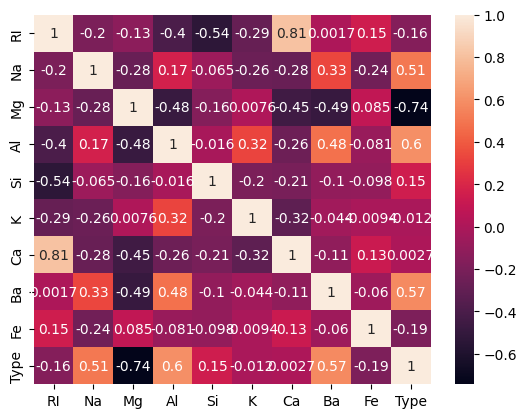

In [116]:
sns.heatmap(corr,annot=True)
plt.show()

In [117]:
klib.corr_mat(glass)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

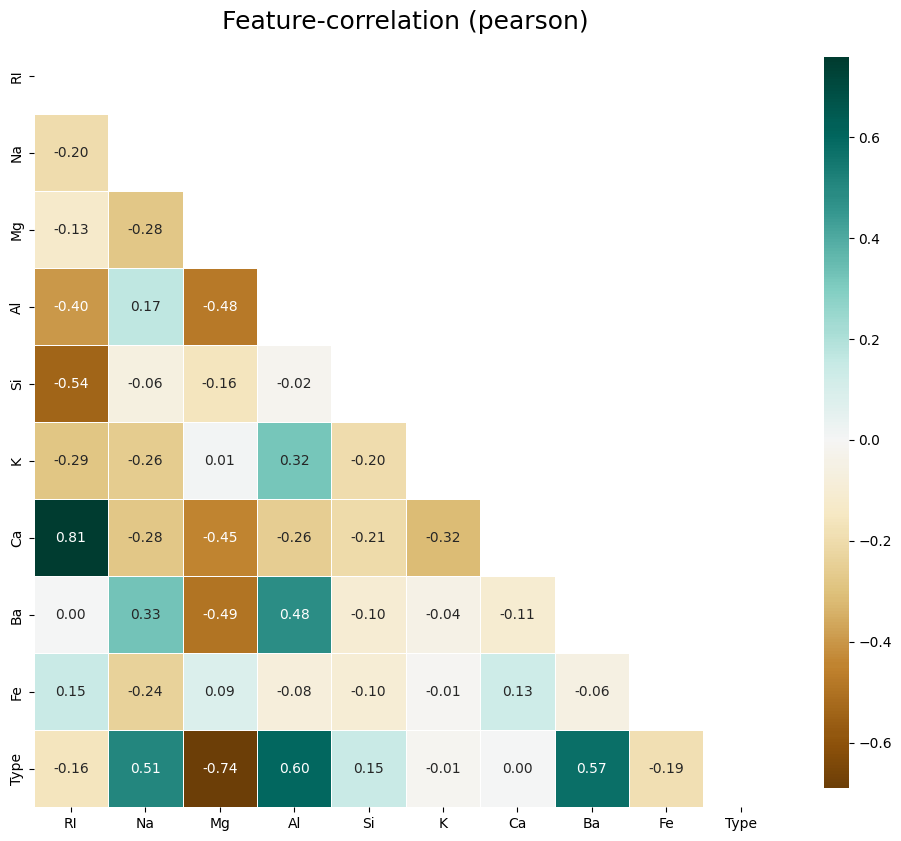

In [118]:
klib.corr_plot(glass)

# **Key Observations**:
1. **Strong Positive Correlations**:
   - `Ca` and `RI` (0.81): Calcium content has a strong positive correlation with refractive index (`RI`), indicating that as `Ca` increases, `RI` tends to increase as well.
   - `Type` and `Al` (0.60): Aluminum content is positively correlated with the target variable `Type`, meaning different glass types may vary significantly with respect to the aluminum concentration.
   - `Type` and `Ba` (0.57): Barium content also shows a strong positive correlation with the glass type (`Type`), suggesting that barium levels help distinguish between glass types.
   
2. **Strong Negative Correlations**:
   - `Type` and `Mg` (-0.74): Magnesium content has a strong negative correlation with `Type`, implying that higher magnesium content is associated with certain glass types.
   - `Mg` and `Al` (-0.48): As magnesium content increases, aluminum content tends to decrease.
   - `RI` and `Si` (-0.54): Refractive index (`RI`) has a strong negative correlation with silicon, meaning higher silicon levels tend to reduce the refractive index.

3. **Moderate Correlations**:
   - `Na` and `Type` (0.51): Sodium levels show a moderate positive correlation with the glass type, implying its potential relevance in classifying glass types.
   - `Al` and `Ba` (0.48): Aluminum and barium are moderately correlated, indicating that both elements might coexist in similar concentrations in certain glass types.
   - `Ca` and `Mg` (-0.45): Calcium and magnesium are negatively correlated, suggesting that when one element is high, the other tends to be low.

4. **Minimal or Weak Correlations**:
   - `Fe` generally shows weak correlations with other features, indicating that iron content might not be as critical in distinguishing glass types or influencing other attributes.
   - Some features, like `K`, have very weak correlations with the target variable `Type` and other attributes, making them potentially less significant in classification tasks.

<Axes: xlabel='Type', ylabel='Density'>

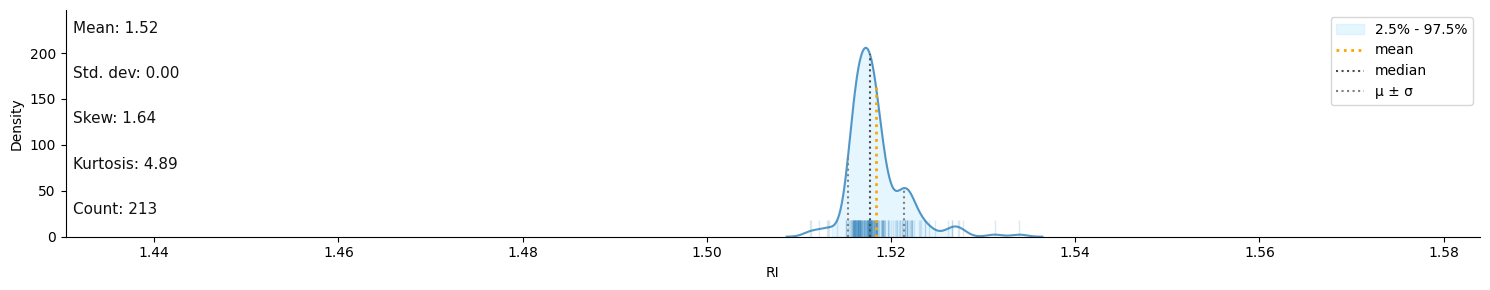

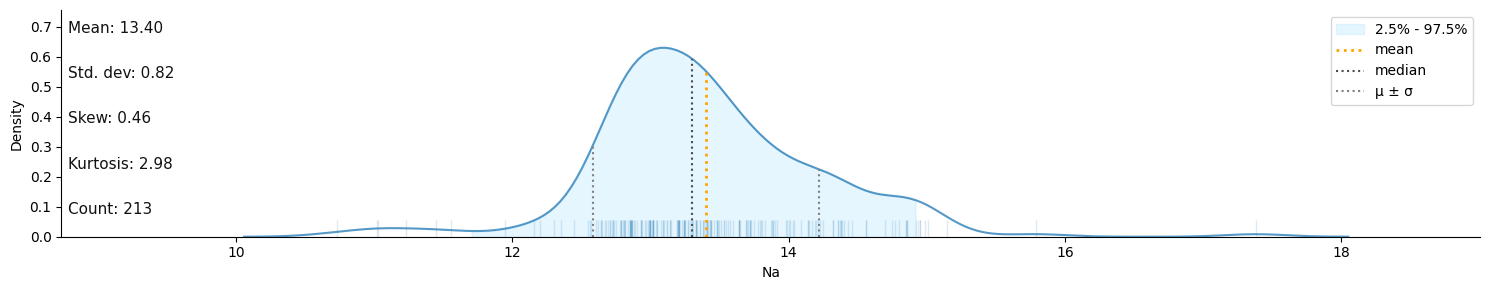

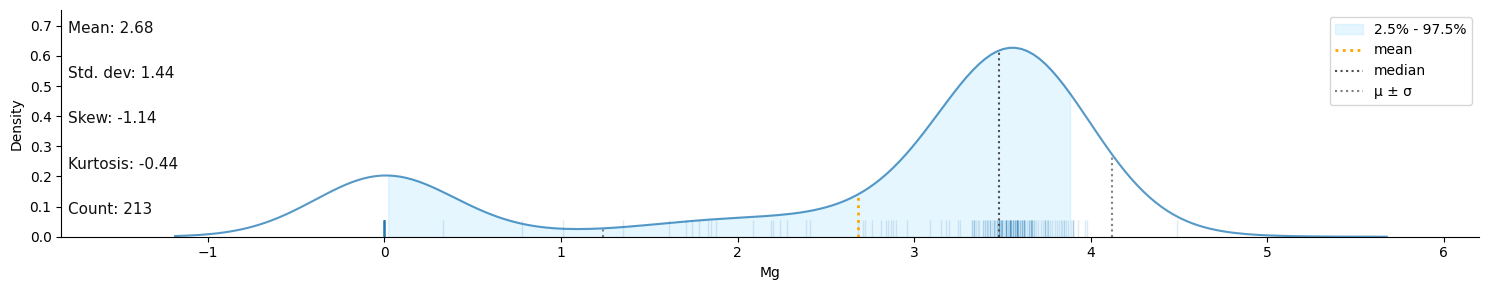

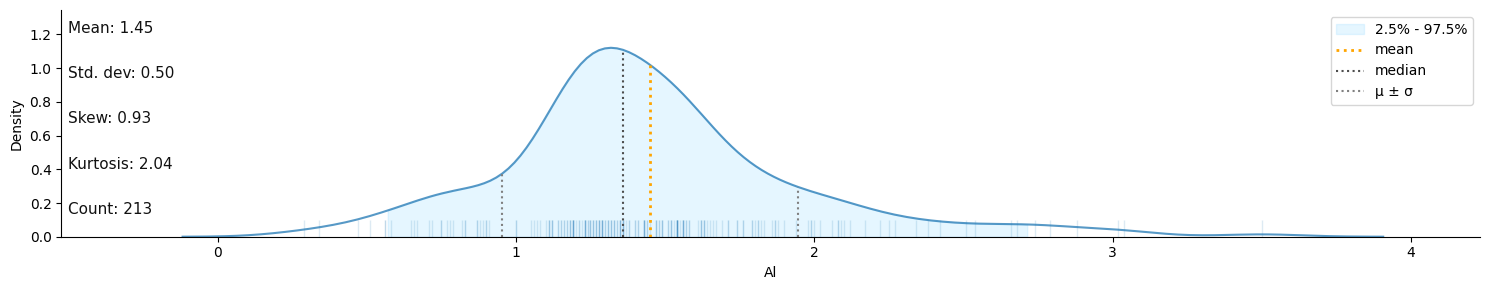

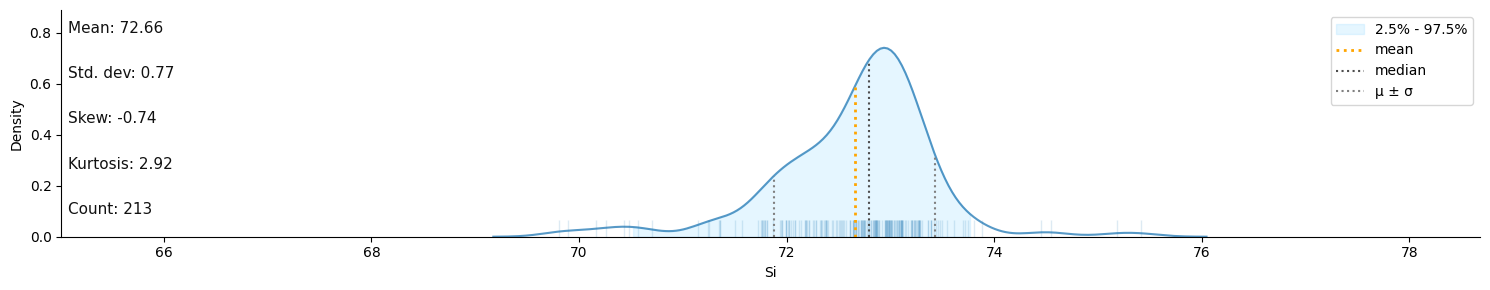

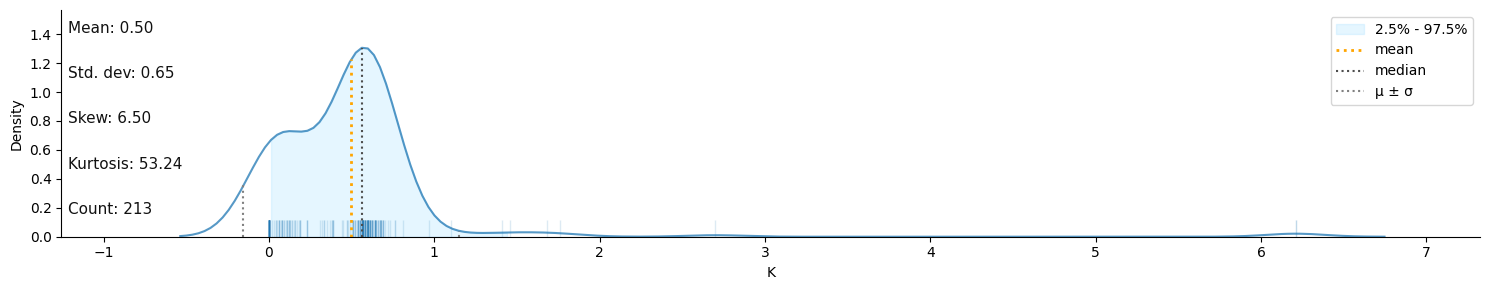

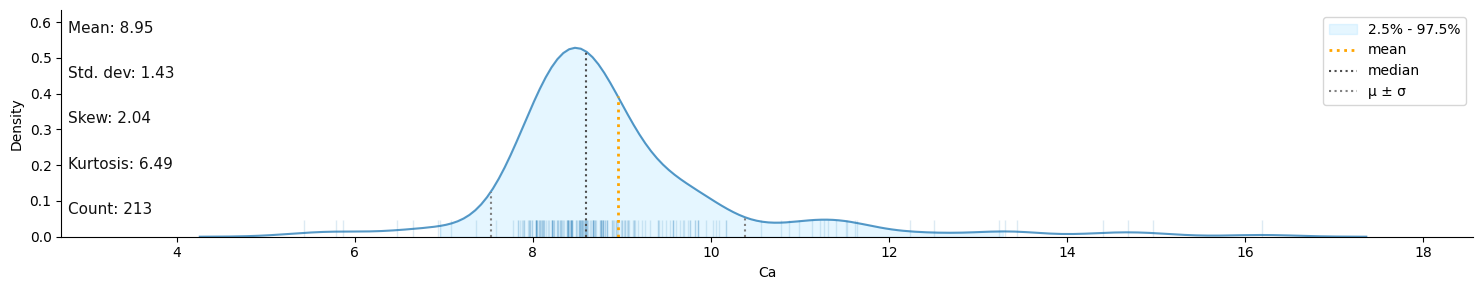

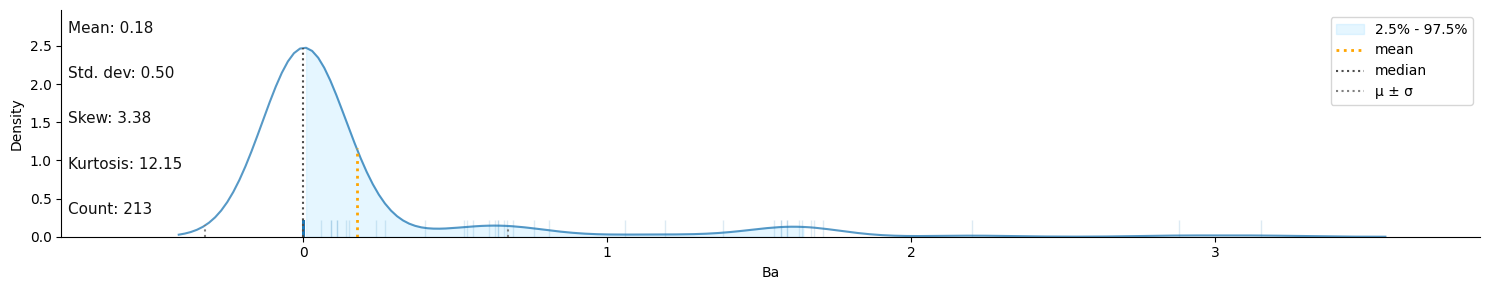

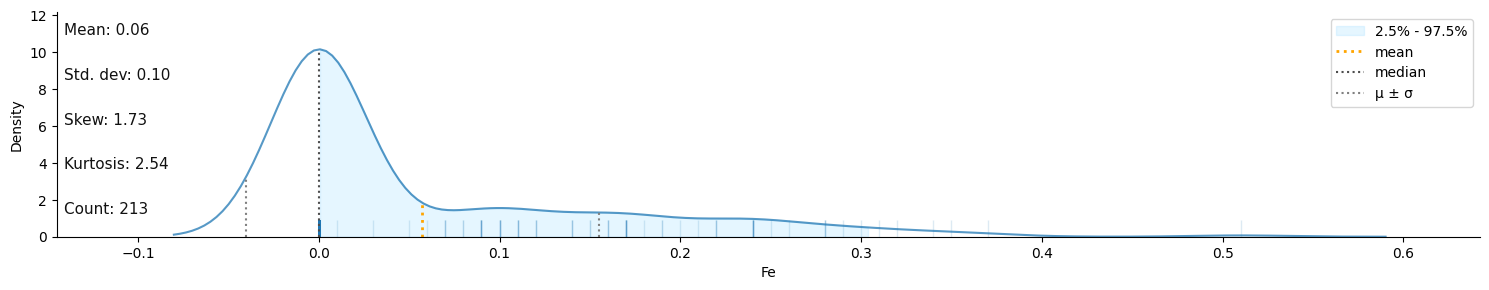

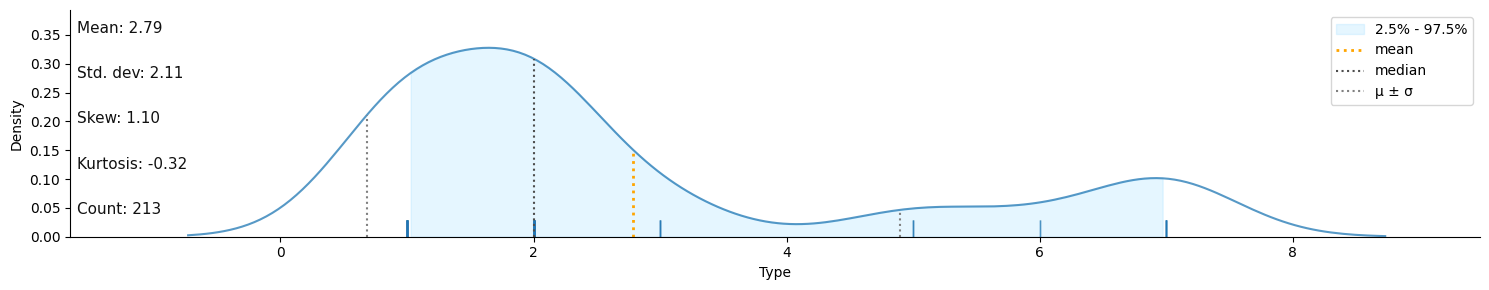

In [119]:
klib.dist_plot(glass)

DataPrep Report
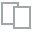
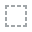
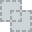
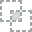
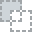
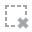
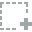
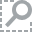
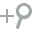
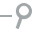
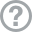
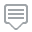
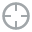
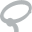
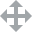
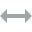
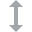
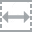
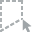
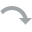
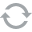
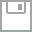
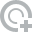
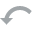
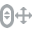
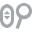
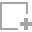
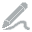
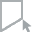
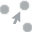
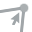
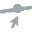

In [120]:
create_report(glass)

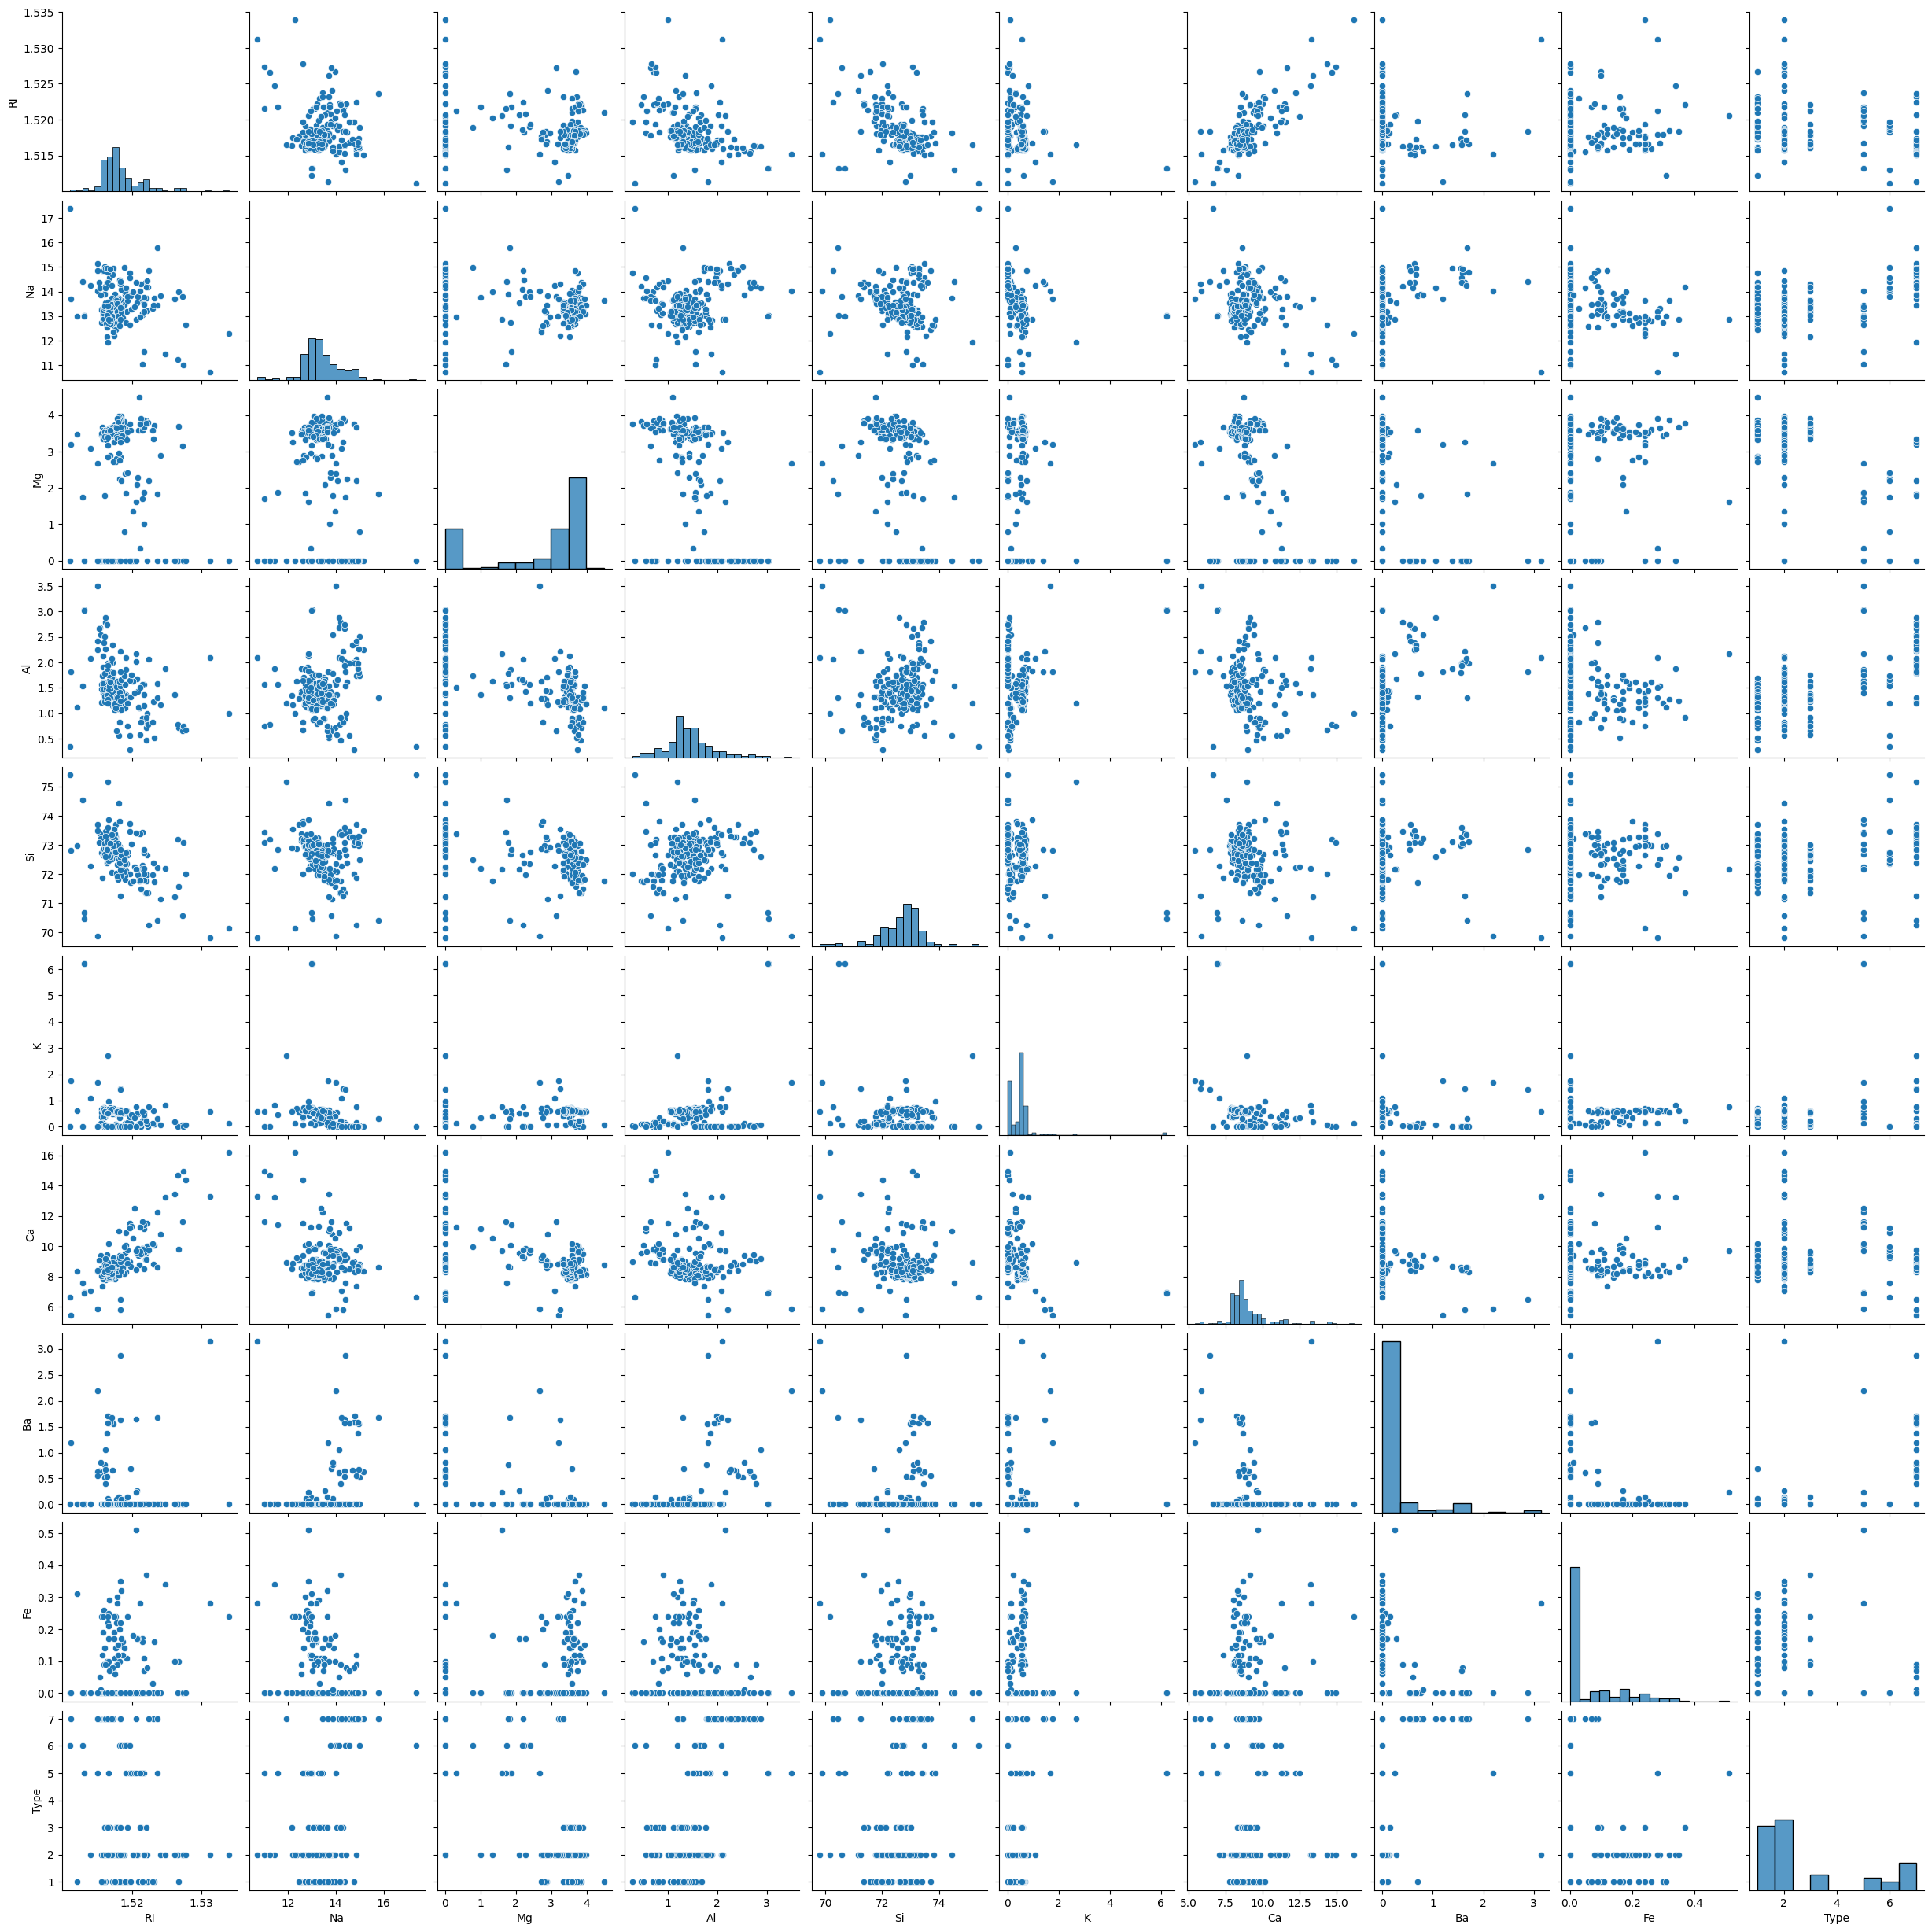

In [121]:
sns.pairplot(glass)
plt.show()

In [122]:
data = glass['Type'].value_counts().reset_index()
data.columns = ['Type','Count']
px.bar(data,x='Type',y='Count',color='Type',template='plotly_dark',
       title='Count of Glass Types',
       text_auto=True)

In [123]:
X = glass.drop('Type',axis=1)
y = glass['Type']

In [124]:
from imblearn.over_sampling import SMOTE # Corrected module and class name
smote = SMOTE()
X,y = smote.fit_resample(X,y)

In [125]:
data = glass['Type'].value_counts().reset_index()
data.columns = ['Type','Count']
px.bar(data,x='Type',y='Count',color='Type',template='plotly_dark',
       title='Count of Glass Types',
       text_auto=True)

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [127]:
for col in X.columns:
    X[col] = scaler.fit_transform(X[[col]])
X.head()

RI        Na        Mg        Al        Si         K        Ca  \
0  1.079509  0.105912  1.572317 -0.886235 -1.287272 -0.534719 -0.329647   
1 -0.245567  0.419631  0.974811 -0.373903  0.023302  0.022254 -1.012821   
2 -0.802879 -0.032124  0.941243 -0.019212  0.381986 -0.097097 -1.049950   
3 -0.226081 -0.433685  1.035233 -0.511839 -0.142244  0.141605 -0.723214   
4 -0.319616 -0.358392  0.988238 -0.610364  0.506145  0.115083 -0.834601   

        Ba        Fe  
0 -0.40907 -0.519078  
1 -0.40907 -0.519078  
2 -0.40907 -0.519078  
3 -0.40907 -0.519078  
4 -0.40907 -0.519078

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [130]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [131]:
y_pred = rf.predict(X_test)

In [132]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.9347826086956522


In [133]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[15  0  2  0  0  0]
 [ 3 16  0  0  0  0]
 [ 1  0  9  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 18]]


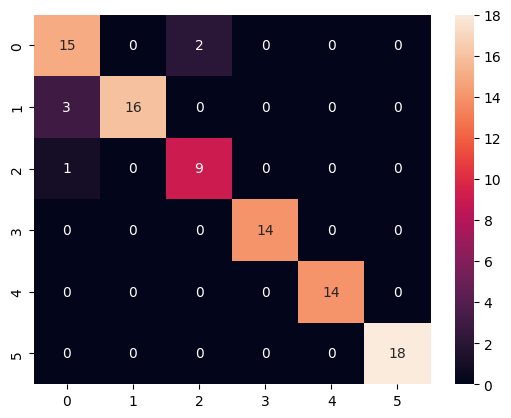

In [134]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

In [135]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.88      0.83        17
           2       1.00      0.84      0.91        19
           3       0.82      0.90      0.86        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.93        92
   macro avg       0.93      0.94      0.93        92
weighted avg       0.94      0.93      0.94        92



In [136]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [137]:
y_pred_proba = rf.predict_proba(X_test) # Get predicted probabilities
print('ROC Score is:', roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))

ROC Score is: 0.995075978222779


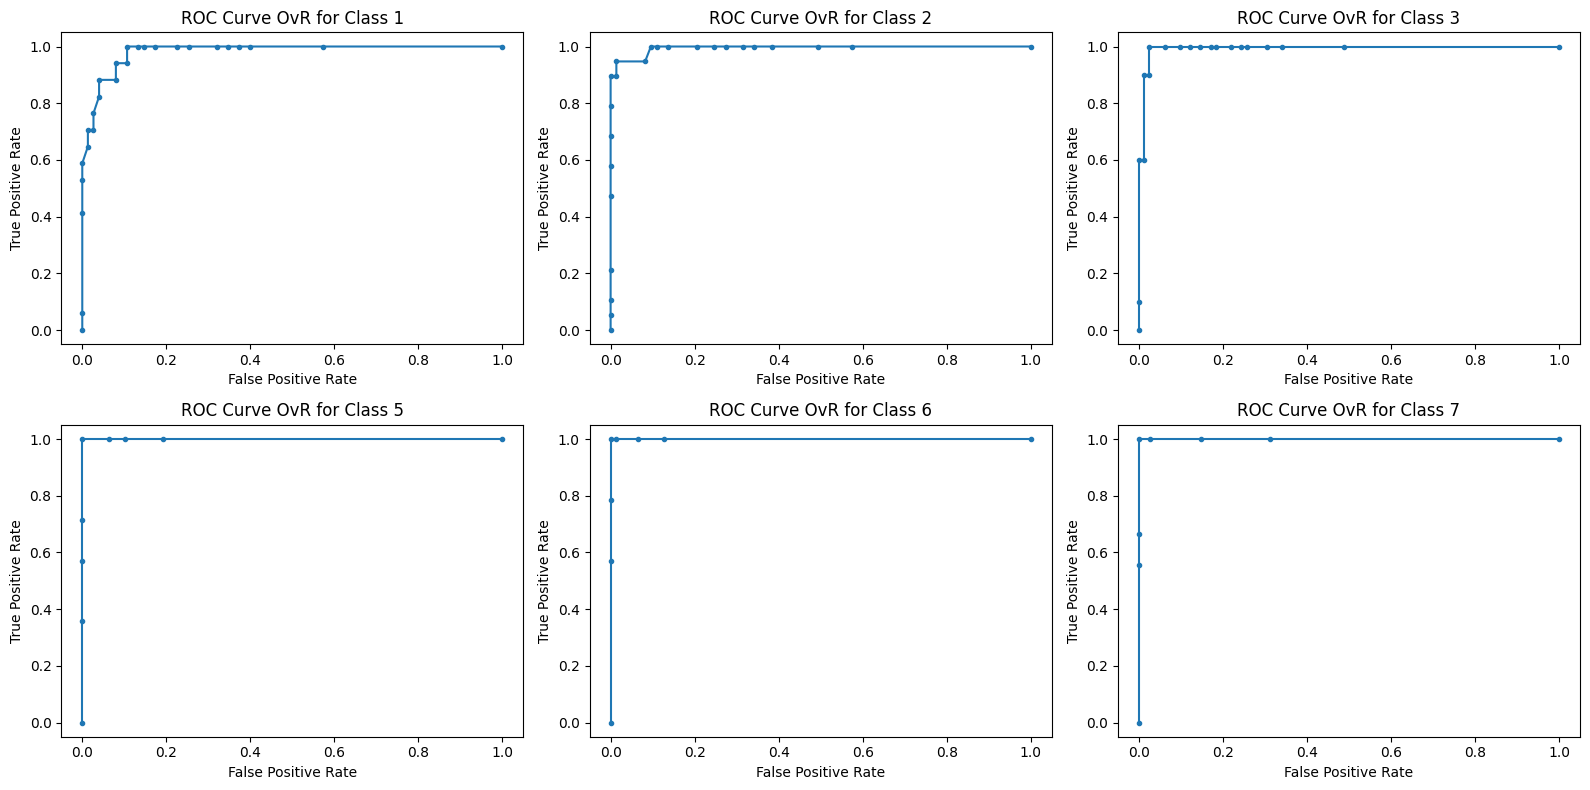

ROC AUC OvR for class 1: 0.98
ROC AUC OvR for class 2: 0.99
ROC AUC OvR for class 3: 0.99
ROC AUC OvR for class 5: 1.00
ROC AUC OvR for class 6: 1.00
ROC AUC OvR for class 7: 1.00


In [138]:
plt.figure(figsize=(16, 8))
classes = rf.classes_  # Assuming this gives the list of class labels
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]

    # Prepares an auxiliary dataframe to help with the ROC curve
    df_aux = X_test.copy()  # X_test is your test data (features)
    df_aux['class'] = [1 if y == c else 0 for y in y_test]  # y_test is your test data (true labels)
    df_aux['prob'] = y_pred_proba[:, i]  # y_proba is the predicted probabilities from the model

    # Calculates the ROC Coordinates and plots the ROC Curves
    fpr, tpr, _ = roc_curve(df_aux['class'], df_aux['prob'])
    ax = plt.subplot(2, 3, i+1)
    ax.plot(fpr, tpr, marker='.')
    ax.set_title(f"ROC Curve OvR for Class {c}")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")

    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

plt.tight_layout()
plt.show()

# Print ROC AUC scores
for c in roc_auc_ovr:
    print(f"ROC AUC OvR for class {c}: {roc_auc_ovr[c]:.2f}")

In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
params = {'n_estimators':[50,100,150,200]}
grid = GridSearchCV(rf,params,cv=5,scoring='precision')
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'n_estimators': 50}
RandomForestClassifier(n_estimators=50)


In [141]:
rf = RandomForestClassifier(n_estimators=50,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [142]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.9347826086956522


In [143]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[15  0  2  0  0  0]
 [ 3 16  0  0  0  0]
 [ 1  0  9  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 18]]


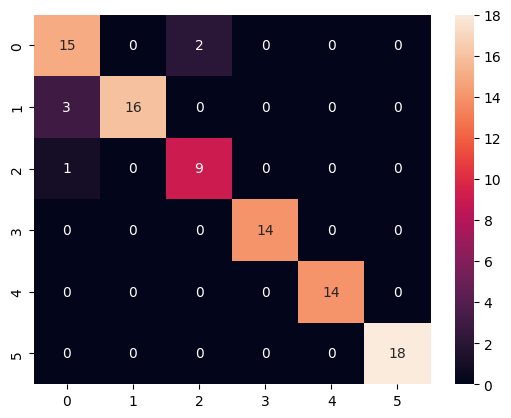

In [144]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

In [145]:
print("Classification Report For RandomForest:\n",classification_report(y_test,y_pred))

Classification Report For RandomForest:
               precision    recall  f1-score   support

           1       0.79      0.88      0.83        17
           2       1.00      0.84      0.91        19
           3       0.82      0.90      0.86        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.93        92
   macro avg       0.93      0.94      0.93        92
weighted avg       0.94      0.93      0.94        92



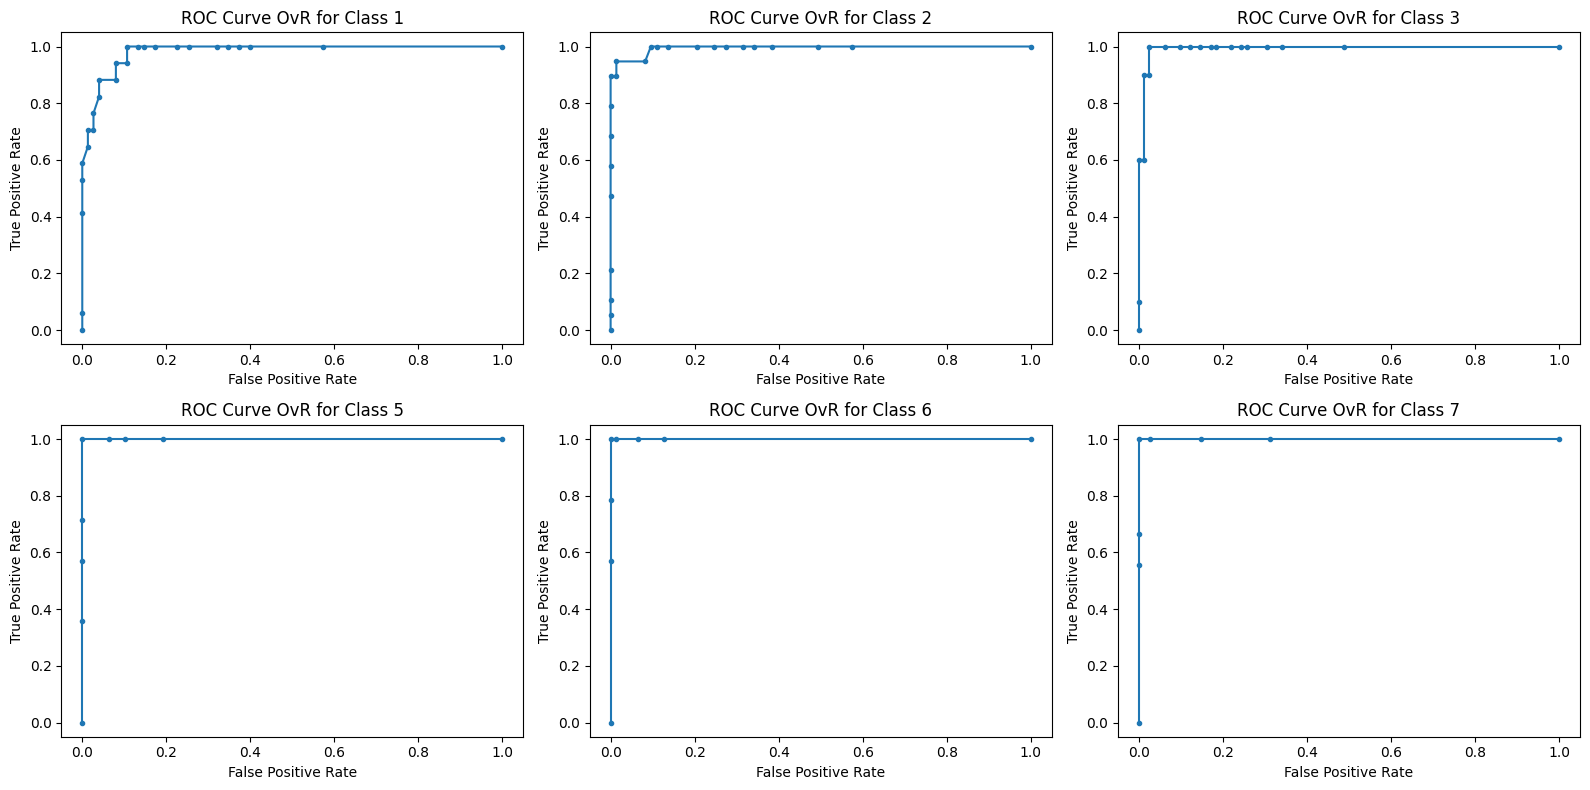

ROC AUC OvR for class 1: 0.98
ROC AUC OvR for class 2: 0.99
ROC AUC OvR for class 3: 0.99
ROC AUC OvR for class 5: 1.00
ROC AUC OvR for class 6: 1.00
ROC AUC OvR for class 7: 1.00


In [146]:
plt.figure(figsize=(16, 8))
classes = rf.classes_  # Assuming this gives the list of class labels
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]

    # Prepares an auxiliary dataframe to help with the ROC curve
    df_aux = X_test.copy()  # X_test is your test data (features)
    df_aux['class'] = [1 if y == c else 0 for y in y_test]  # y_test is your test data (true labels)
    df_aux['prob'] = y_pred_proba[:, i]  # y_proba is the predicted probabilities from the model

    # Calculates the ROC Coordinates and plots the ROC Curves
    fpr, tpr, _ = roc_curve(df_aux['class'], df_aux['prob'])
    ax = plt.subplot(2, 3, i+1)
    ax.plot(fpr, tpr, marker='.')
    ax.set_title(f"ROC Curve OvR for Class {c}")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")

    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

plt.tight_layout()
plt.show()

# Print ROC AUC scores
for c in roc_auc_ovr:
    print(f"ROC AUC OvR for class {c}: {roc_auc_ovr[c]:.2f}")

In [147]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [148]:
bagging = BaggingClassifier(DecisionTreeClassifier(),n_estimators=50,random_state=42)
bagging.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [149]:
y_pred = bagging.predict(X_test)

In [150]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.9239130434782609


In [151]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[15  0  2  0  0  0]
 [ 2 16  1  0  0  0]
 [ 1  0  9  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  1  0  0  0 17]]


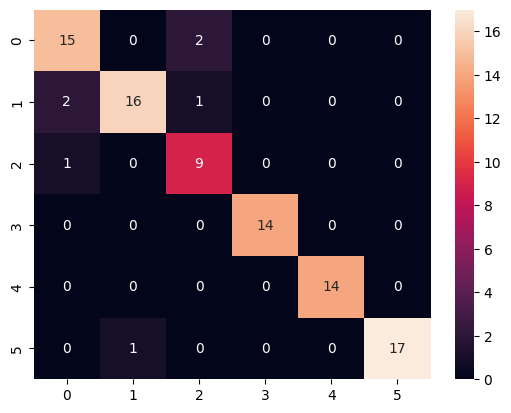

In [152]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

In [153]:
print("Classification Report For Bagging:\n",classification_report(y_test,y_pred))

Classification Report For Bagging:
               precision    recall  f1-score   support

           1       0.83      0.88      0.86        17
           2       0.94      0.84      0.89        19
           3       0.75      0.90      0.82        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.92      0.93      0.92        92
weighted avg       0.93      0.92      0.93        92



In [166]:
boost = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=50,random_state=42)
boost.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [167]:
y_pred = boost.predict(X_test)

In [168]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.8913043478260869


In [169]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[14  3  0  0  0  0]
 [ 4 15  0  0  0  0]
 [ 1  1  8  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  1  0 17]]


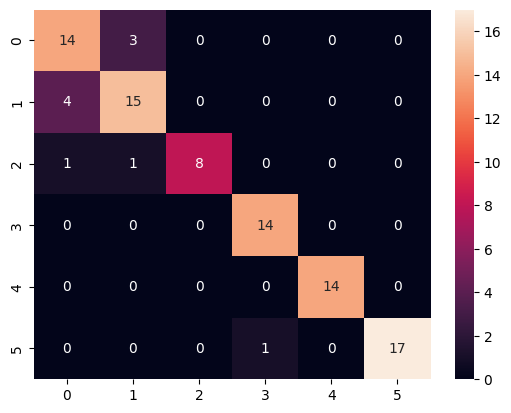

In [170]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

In [171]:
print("Classification Report For Boosting:\n",classification_report(y_test,y_pred))

Classification Report For Boosting:
               precision    recall  f1-score   support

           1       0.74      0.82      0.78        17
           2       0.79      0.79      0.79        19
           3       1.00      0.80      0.89        10
           5       0.93      1.00      0.97        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.89        92
   macro avg       0.91      0.89      0.90        92
weighted avg       0.90      0.89      0.89        92



# **Comparison**:

1. **Accuracy**:
   - Random Forest (0.93) and Bagging (0.92) outperform Boosting (0.89) in terms of overall accuracy.
   
2. **Macro Avg F1-Score**:
   - Random Forest has the highest macro avg F1-score (0.93), followed by Bagging (0.92), and then Boosting (0.90). This suggests Random Forest is better at handling imbalanced class performance.

3. **Class-wise Performance**:
   - Random Forest is generally the strongest across all classes, especially for classes 5, 6, and 7 (perfect scores).
   - Bagging performs similarly to Random Forest but has a slight dip in precision for class 3.
   - Boosting, while effective, shows a noticeable drop in precision and recall for classes 1 and 2, making it less reliable for those classes.

4. **Strengths**:
   - **Random Forest** and **Bagging** are highly effective for most classes, with Bagging slightly trailing in terms of performance consistency.
   - **Boosting** shows weaker performance for classes 1 and 2 but can still excel with some classes, especially class 3 in terms of precision.


# **Additional Notes**

# **Explain Bagging and Boosting methods. How is it different from each other.**

##What is Bagging?

* Bagging (Bootstrap Aggregating) is an ensemble learning technique designed to improve the accuracy and stability of machine learning algorithms. It involves the following steps:

**Data Sampling:** Creating multiple subsets of the training dataset using bootstrap sampling (random sampling with replacement).

**Model Training:** raining a separate model on each subset of the data.

**Aggregation:** Combining the predictions from all individual models (averaged for regression or majority voting for classification) to produce the final output.

##What is Boosting?

* Boosting is another ensemble learning technique that focuses on creating a strong model by combining several weak models. It involves the following steps:

**Sequential Training:** Training models sequentially, each one trying to correct the errors made by the previous models.

**Weight Adjustment:** Each instance in the training set is weighted. Initially, all instances have equal weights. After each model is trained, the weights of misclassified instances are increased so that the next model focuses more on difficult cases.

**Model Combination:** Combining the predictions from all models to produce the final output, typically by weighted voting or weighted averaging.

##Differences between Bagging and Boosting

* Bagging trains each base model independently and in parallel, using bootstrap sampling to create multiple subsets of the training data. The final prediction is then made by averaging the predictions of all base models. Bagging focuses on reducing variance and overfitting by creating diverse models.

* In contrast, boosting trains models sequentially, with each subsequent model focusing on correcting the errors made by the previous ones. Boosting adjusts the weights of training instances to prioritize difficult-to-classify instances, thus reducing bias and improving predictive accuracy. The final prediction is made by combining the predictions of all models, typically using a weighted voting or averaging approach.

# **Explain how to handle imbalance in the data.**

### 1. **Resampling Techniques**:
   - **Oversampling the Minority Class**:
     - This involves increasing the number of instances in the minority class by duplicating them or generating synthetic samples.
     - **SMOTE (Synthetic Minority Over-sampling Technique)**: A popular technique that generates synthetic samples by interpolating between existing minority class samples.
     - Libraries like `imbalanced-learn` in Python provide tools for oversampling.
   
   - **Undersampling the Majority Class**:
     - This reduces the number of majority class instances to balance the dataset by randomly removing some instances.
     - The downside is that it can lead to the loss of potentially important data from the majority class.

   - **Combination of Over- and Undersampling**:
     - You can also apply a combination of both to balance the dataset more effectively.

### 2. **Class Weighting**:
   - Most machine learning algorithms, such as **Random Forest**, **Logistic Regression**, and **SVM**, have a `class_weight` parameter.
   - By assigning a higher weight to the minority class and a lower weight to the majority class, the algorithm gives more importance to minority class samples.
   - This avoids altering the dataset distribution but adjusts the learning process to account for class imbalance.

### 3. **Anomaly Detection**:
   - If the minority class is very small (e.g., less than 1% of the data), the problem can be approached as an anomaly detection task.
   - Models like **One-Class SVM**, **Isolation Forest**, or **Autoencoders** can be used to identify the minority class as anomalies.

### 4. **Use of Evaluation Metrics for Imbalanced Data**:
   - Relying on **accuracy** can be misleading in imbalanced datasets. Instead, you should use metrics that are more sensitive to class imbalance, such as:
     - **Precision**: Focuses on the accuracy of the positive predictions.
     - **Recall**: Focuses on the ability to capture positive class instances.
     - **F1-Score**: Harmonic mean of precision and recall, balancing the two.
     - **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)**: Measures how well the model distinguishes between classes.
     - **Confusion Matrix**: Provides insights into false positives and false negatives.

### 5. **Ensemble Methods**:
   - Ensemble methods like **Random Forest** and **Gradient Boosting** can handle class imbalance better than simple models, especially when combined with class weighting or resampling.
   - **BalancedBaggingClassifier** from `imbalanced-learn` can be used to apply bagging with balancing:

### 6. **Cost-Sensitive Learning**:
   - Instead of changing the dataset distribution or weighting classes manually, you can incorporate the imbalance into the cost function.
   - The model is penalized more for misclassifying minority class instances than majority class instances. Cost-sensitive models attempt to optimize this cost during training.
   - This is an advanced technique, but it can be very powerful in cases of severe imbalance.

### 7. **Data Augmentation**:
   - If possible, create new samples for the minority class by generating synthetic data or collecting more data.
   - Techniques like **data augmentation** are widely used in fields like image classification to generate more diverse training data, reducing the imbalance.